In [1]:
import glob
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt

In [2]:
# Display all rows of a pandas data frame:
pd.set_option('display.max_rows', None)

# Customize the pyplot figure:
plt.rcParams.update({
    'figure.figsize': (12, 9),
    'font.size': 15,
    'grid.linestyle': 'dotted',
})

# Get the pyplot default color cycle:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Set the tel-combination names:
combo_names = {
    12: 'LST1 + M1',
    13: 'LST1 + M2',
}

# Get the paths to coincidence data files

In [3]:
# ================
# === Settings ===
# ================

data_mask = '/home/yoshiki.ohtani/lstmagic/real/CrabNebula/2020_12_15/' \
            '2.event_coincidence/data/dl1_coincidence/*Run03265.*.h5'

# ============
# === Main ===
# ============

input_files = glob.glob(data_mask)
input_files.sort()

print(data_mask)
print(f'--> {len(input_files)} files are found')

/home/yoshiki.ohtani/lstmagic/real/CrabNebula/2020_12_15/2.event_coincidence/data/dl1_coincidence/*Run03265.*.h5
--> 91 files are found


In [4]:
input_files[0:5]

['/home/yoshiki.ohtani/lstmagic/real/CrabNebula/2020_12_15/2.event_coincidence/data/dl1_coincidence/dl1_LST-1_MAGIC.Run03265.0004.h5',
 '/home/yoshiki.ohtani/lstmagic/real/CrabNebula/2020_12_15/2.event_coincidence/data/dl1_coincidence/dl1_LST-1_MAGIC.Run03265.0005.h5',
 '/home/yoshiki.ohtani/lstmagic/real/CrabNebula/2020_12_15/2.event_coincidence/data/dl1_coincidence/dl1_LST-1_MAGIC.Run03265.0006.h5',
 '/home/yoshiki.ohtani/lstmagic/real/CrabNebula/2020_12_15/2.event_coincidence/data/dl1_coincidence/dl1_LST-1_MAGIC.Run03265.0007.h5',
 '/home/yoshiki.ohtani/lstmagic/real/CrabNebula/2020_12_15/2.event_coincidence/data/dl1_coincidence/dl1_LST-1_MAGIC.Run03265.0008.h5']

# Check the coincidence profiles

In [5]:
input_file = input_files[0]

print('Loading the following input file:')
print(Path(input_file).name)

df_feature = pd.read_hdf(input_file, key='coincidence/features')
df_profile = pd.read_hdf(input_file, key='coincidence/profile')

Loading the following input file:
dl1_LST-1_MAGIC.Run03265.0004.h5


In [6]:
df_feature

,coincidence_id,unix_time,pointing_alt_lst,pointing_alt_magic,pointing_az_lst,pointing_az_magic,offset_avg_usec,n_coincidence,n_events_magic
0,12,1.608068e+09,0.699347,0.699262,1.467619,1.467631,-3.366517,1182,1501
1,13,1.608068e+09,0.699339,0.699233,1.467615,1.467627,-3.239896,1273,1630


In [7]:
df_profile

,offset_usec,n_coincidence_tel12,n_coincidence_btwn_tel12,n_coincidence_tel13,n_coincidence_btwn_tel13
0,-10.0,1,1,1,1
1,-9.9,1,1,1,1
2,-9.8,1,0,1,1
3,-9.7,0,0,2,2
4,-9.6,0,0,2,1
5,-9.5,0,0,1,1
6,-9.4,0,0,1,1
7,-9.3,0,0,1,1
8,-9.2,0,0,1,1
9,-9.1,0,0,1,0


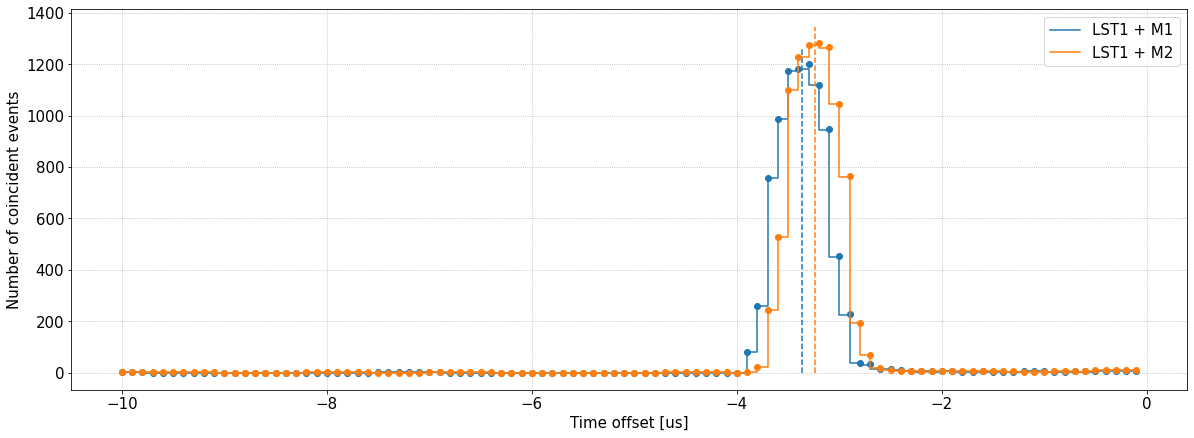

In [8]:
plt.figure(figsize=(20, 7))
plt.xlabel('Time offset [us]')
plt.ylabel('Number of coincident events')
plt.grid()

coincidence_ids = df_feature['coincidence_id'].to_numpy()

for i_combo, coincidence_id in enumerate(coincidence_ids):

    plt.plot(
        df_profile['offset_usec'].to_numpy(),
        df_profile[f'n_coincidence_tel{coincidence_id}'].to_numpy(), 
        linestyle='None', marker='o', color=colors[i_combo],
    )
    
    plt.step(
        df_profile['offset_usec'].to_numpy(),
        df_profile[f'n_coincidence_btwn_tel{coincidence_id}'].to_numpy(), 
        where='post', color=colors[i_combo], label=combo_names[coincidence_id],
    )
    
    offset_avg = df_feature.query(f'coincidence_id == {coincidence_id}')['offset_avg_usec'].to_numpy()[0]
    
    plt.plot(np.repeat(offset_avg, 2), (0, plt.ylim()[1]), linestyle='--', color=colors[i_combo])

plt.legend()

# Check the coincidence performance

In [9]:
print('Loading the input files...')

data_list = []

for i_file, input_file in enumerate(input_files):
    
    if i_file % 10 == 0:
        print(f'{i_file}/{len(input_files)}')
    
    df = pd.read_hdf(input_file, key='coincidence/features')
    data_list.append(df)

print(f'{i_file+1}/{len(input_files)}')
    
features = pd.concat(data_list)
    
print('\nDone.')

Loading the input files...
0/91
10/91
20/91
30/91
40/91
50/91
60/91
70/91
80/91
90/91
91/91

Done.


In [10]:
features.head()

,coincidence_id,unix_time,pointing_alt_lst,pointing_alt_magic,pointing_az_lst,pointing_az_magic,offset_avg_usec,n_coincidence,n_events_magic
0,12,1.608068e+09,0.699347,0.699262,1.467619,1.467631,-3.366517,1182,1501
1,13,1.608068e+09,0.699339,0.699233,1.467615,1.467627,-3.239896,1273,1630
0,12,1.608068e+09,0.699874,0.699789,1.467874,1.467881,-3.366483,1173,1515
1,13,1.608068e+09,0.699876,0.699777,1.467875,1.467883,-3.238096,1265,1624
0,12,1.608068e+09,0.700434,0.700365,1.468124,1.468143,-3.363110,1228,1591


### Check the average offsets:

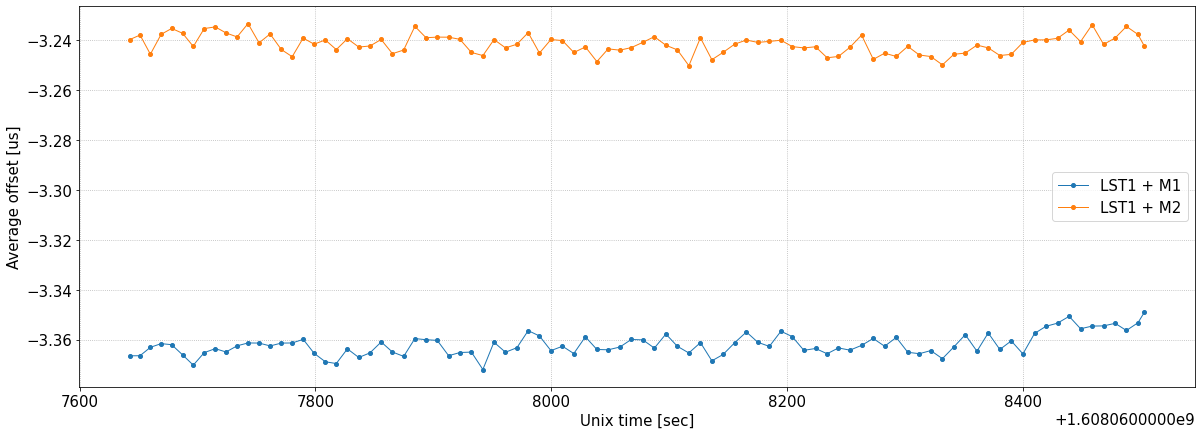

In [11]:
plt.figure(figsize=(20, 7))
plt.xlabel('Unix time [sec]')
plt.ylabel('Average offset [us]')
plt.grid()

for coincidence_id in coincidence_ids:
    
    df = features.query(f'coincidence_id == {coincidence_id}')

    plt.plot(
        df['unix_time'].to_numpy(), df['offset_avg_usec'].to_numpy(), 
        marker='o', markersize=4, linewidth=1, label=combo_names[coincidence_id],
    )
    
plt.legend()

### Check the number of coincident events:

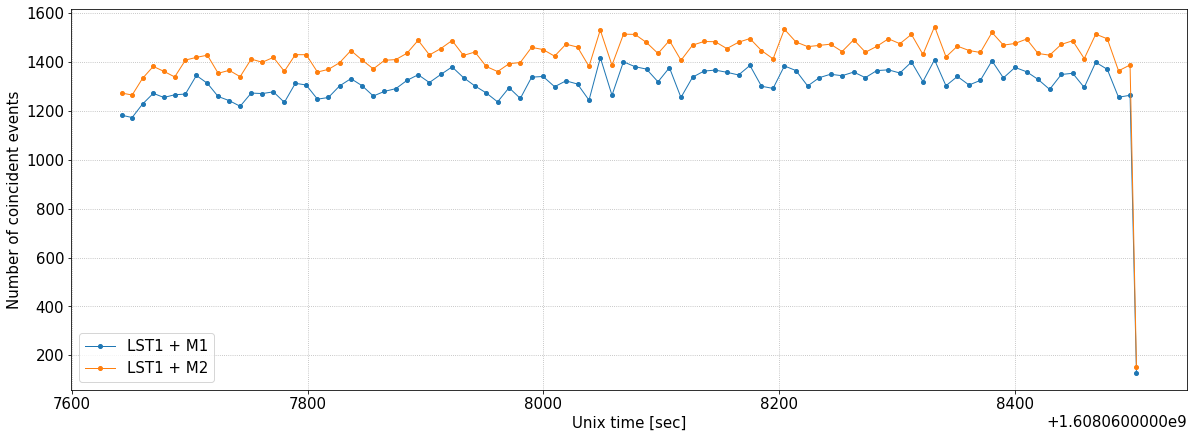

In [12]:
plt.figure(figsize=(20, 7))
plt.xlabel('Unix time [sec]')
plt.ylabel('Number of coincident events')
plt.grid()

for coincidence_id in coincidence_ids:
    
    df = features.query(f'coincidence_id == {coincidence_id}')

    plt.plot(
        df['unix_time'].to_numpy(), df['n_coincidence'].to_numpy(), 
        marker='o', markersize=4, linewidth=1, label=combo_names[coincidence_id],
    )
    
plt.legend()

### Check the ratio of coincident events over MAGIC events:

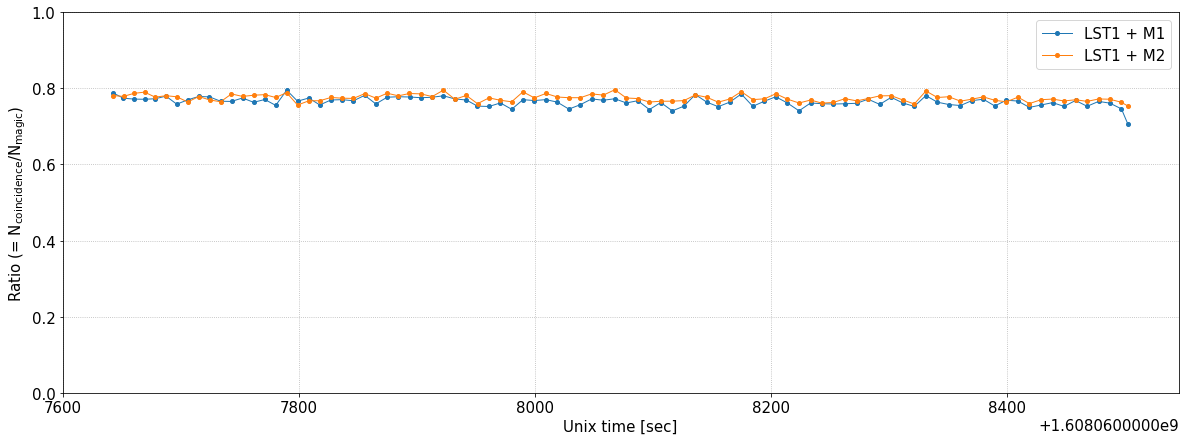

In [13]:
plt.figure(figsize=(20, 7))
plt.xlabel('Unix time [sec]')
plt.ylabel('Ratio (= N$_\mathrm{coincidence}$/N$_\mathrm{magic}$)')
plt.ylim(0, 1)
plt.grid()

for coincidence_id in coincidence_ids:
    
    df = features.query(f'coincidence_id == {coincidence_id}')

    plt.plot(
        df['unix_time'].to_numpy(), df['n_coincidence'].to_numpy()/df['n_events_magic'].to_numpy(), 
        marker='o', markersize=4, linewidth=1, label=combo_names[coincidence_id],
    )
    
plt.legend()